In [48]:
from standardInclude import *

In [49]:
f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_0_15991.00148.root") #100 files, ~1/300 of the 60h dataset
t = f.Get("farline").Get("evwTree")
t.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :   150741 : Total =        68146899 bytes  File  Size =   28543882 *
*        :          : Tree compression factor =   2.39                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   150741 : Total  Size=     605097 bytes  File Size  =       5095 *
*Baskets :       19 : Basket Size=      32000 bytes  Compression= 118.63     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   150741 : Total  Size=     605166 bytes  File Size  =       5132 *
*Baskets :       19 : Basket Size=      32000 bytes  Compression= 117.78     *
*...................................................

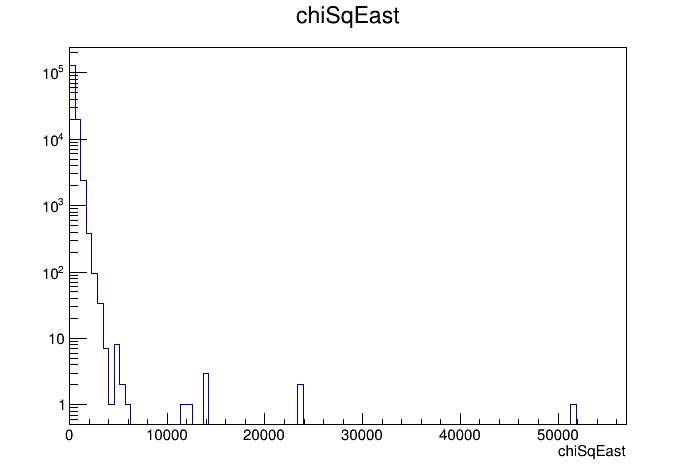

In [50]:
c = r.TCanvas()
t.Draw("chiSqEast")
c.SetLogy()
c.Draw()

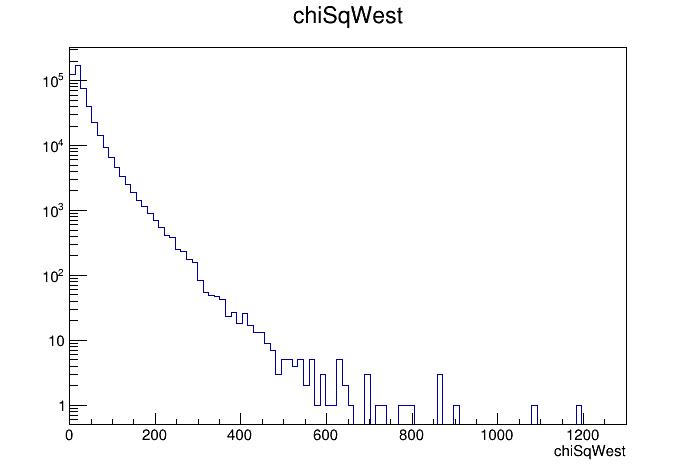

In [51]:
c = r.TCanvas()
t.Draw("chiSqWest")
c.SetLogy()
c.Draw()

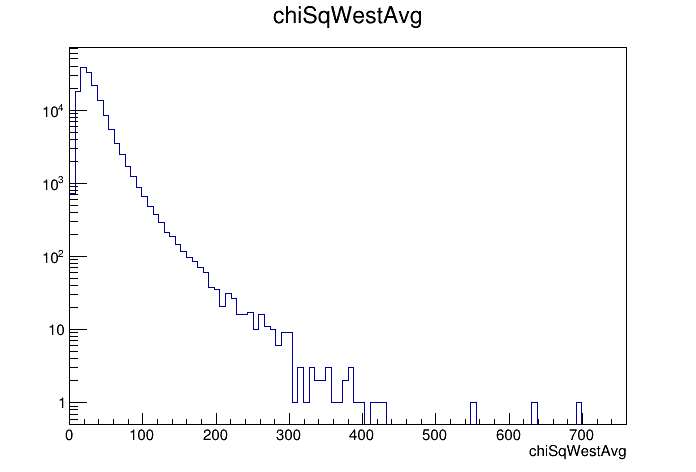

In [52]:
c = r.TCanvas()
t.Draw("chiSqWestAvg")
c.SetLogy()
c.Draw()

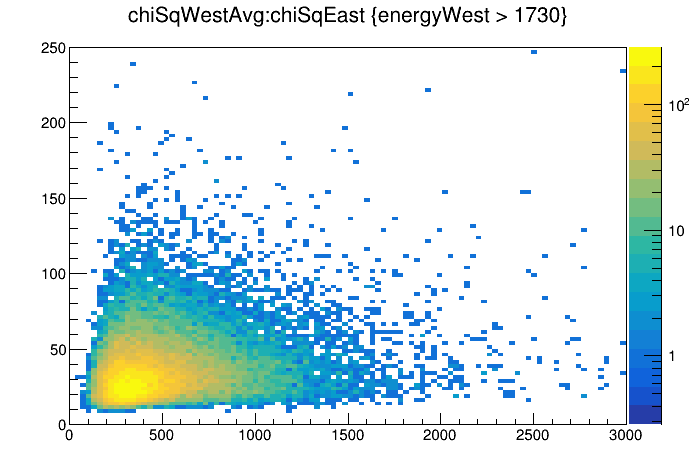

In [53]:
c = r.TCanvas()
t.Draw("chiSqWestAvg:chiSqEast>>hist(100,0,3000,100,0,250)","energyWest > 1730","colz")
c.SetLogz()
c.Draw()

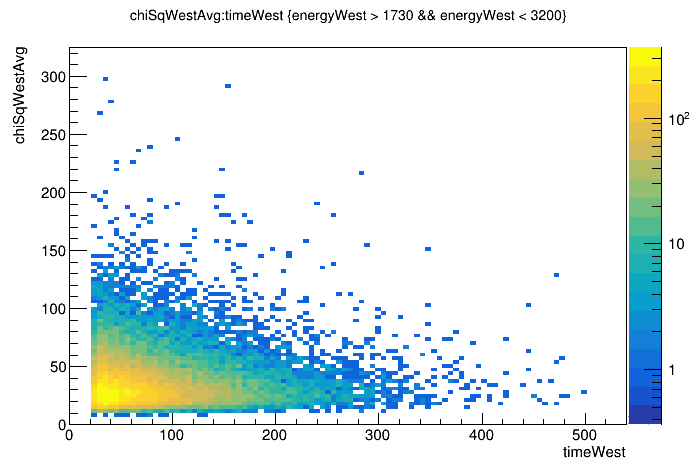

In [54]:
c = r.TCanvas()
t.Draw("chiSqWestAvg:timeWest","energyWest > 1730 && energyWest < 3200","colz")
c.SetLogz()
c.Draw()

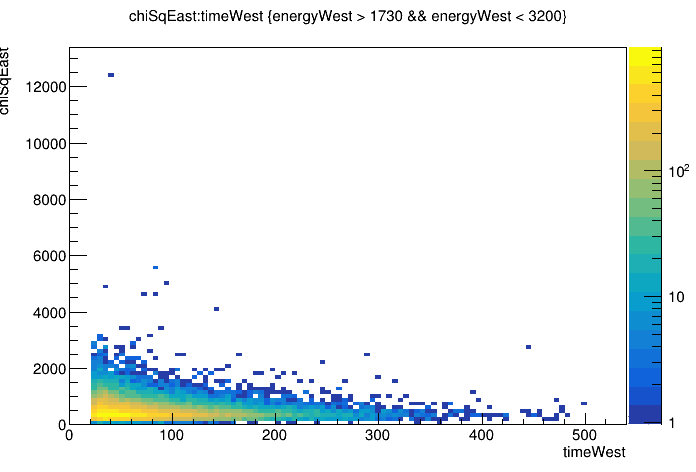

In [55]:
c = r.TCanvas()
t.Draw("chiSqEast:timeWest","energyWest > 1730 && energyWest < 3200","colz")
c.SetLogz()
c.Draw()

---

### Lets see if we can normalize these by bin contents

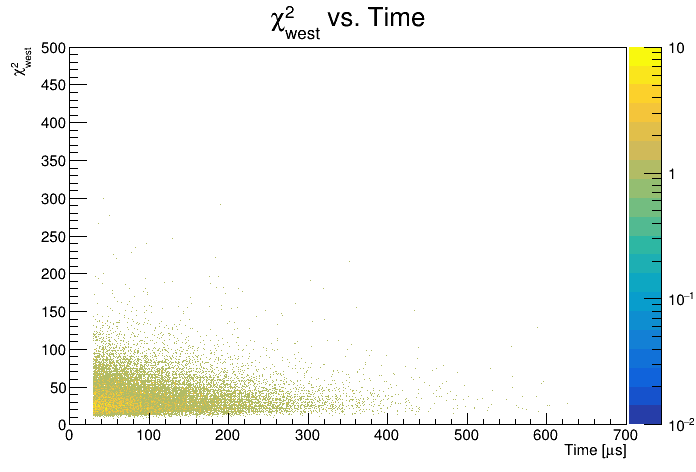

In [56]:
c = r.TCanvas()
h = r.TH2D("h","#chi^{2}_{west} vs. Time; Time [#mus]; #chi^{2}_{west}", 4700,0,700,500,0,500)
t.Draw("chiSqWestAvg:timeWest*1.25/1000.>>h","energyWest > 1730","goff")
h.Draw("colz")
c.SetLogz()
c.Draw()

In [57]:
h2 = h.Clone("h2")
hx = h.ProjectionX().Clone()

bins = []

for bin in range(hx.GetNbinsX()):
    #print(bin, hx.GetBinContent(bin))
    bins.append( hx.GetBinContent(bin) )

for binx in range(h2.GetNbinsX()):
    for biny in range(h2.GetNbinsY()):
        content = h2.GetBinContent(binx,biny)
        if(content > 0):
            h2.SetBinContent(binx,biny,content/bins[binx])

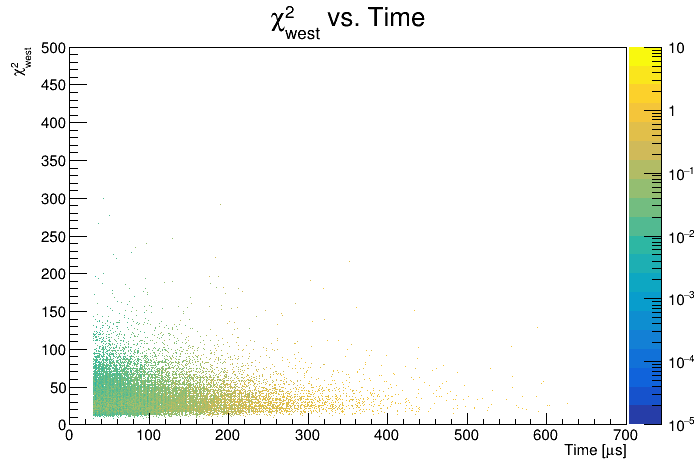

In [58]:
c = r.TCanvas()
h2.Draw("colz")
h2.GetZaxis().SetRangeUser(0.00001,10)
c.SetLogz()
c.Draw()

---

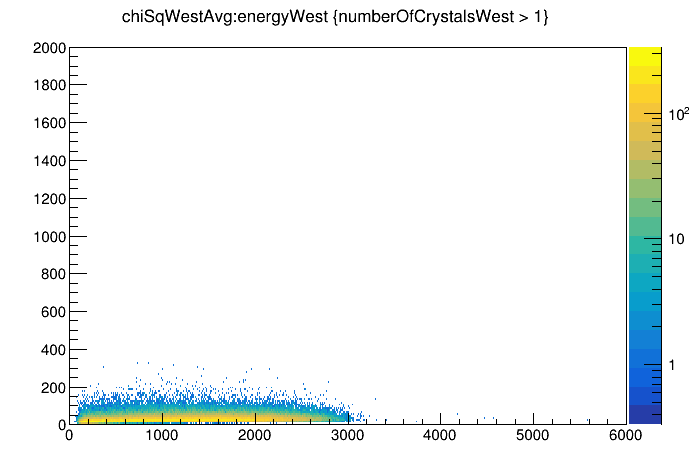

In [59]:
c = r.TCanvas()
t.Draw("chiSqWestAvg:energyWest>>hist(600,0,6000,200,0,2000)","numberOfCrystalsWest > 1","colz")
c.SetLogz()
c.Draw()

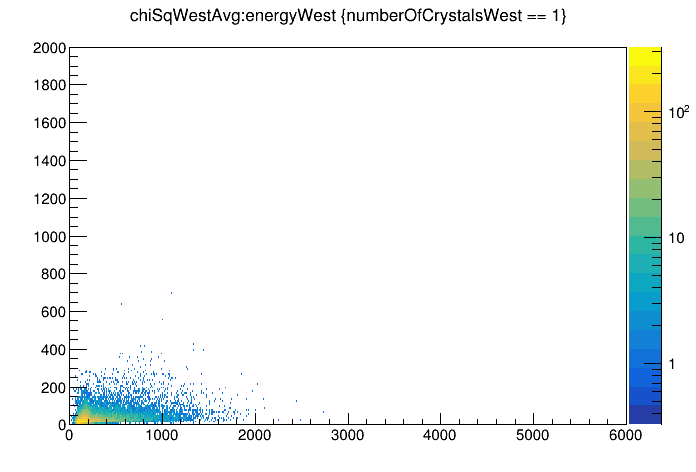

In [60]:
c = r.TCanvas()
t.Draw("chiSqWestAvg:energyWest>>hist(600,0,6000,200,0,2000)","numberOfCrystalsWest == 1","colz")
c.SetLogz()
c.Draw()

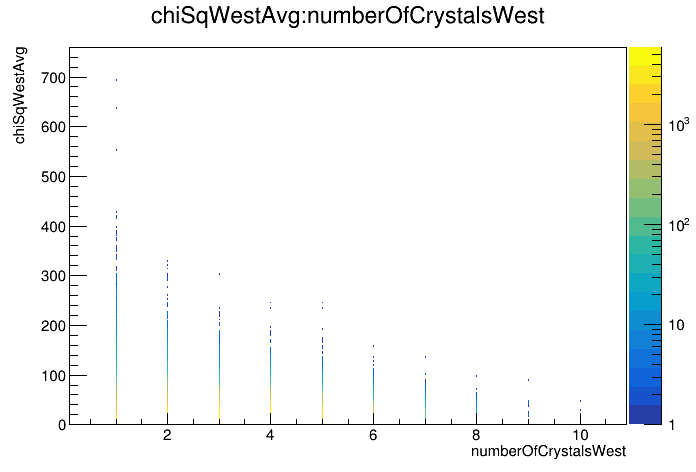

In [61]:
c = r.TCanvas()
t.Draw("chiSqWestAvg:numberOfCrystalsWest","","colz")
c.SetLogz()
c.Draw()

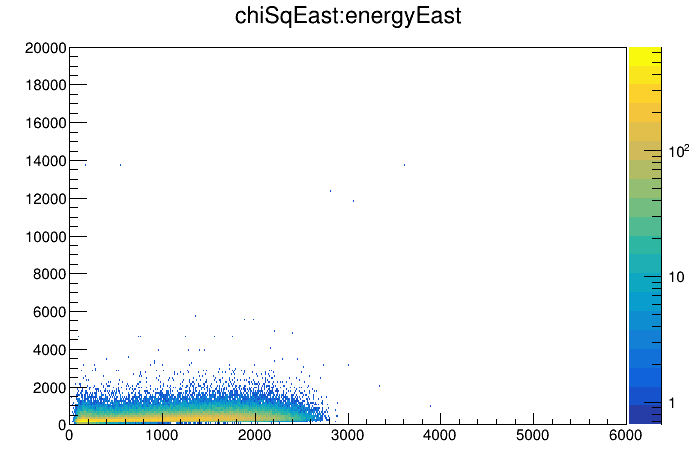

In [62]:
c = r.TCanvas()
t.Draw("chiSqEast:energyEast>>hist(600,0,6000,200,0,20000)","","colz")
c.SetLogz()
c.Draw()